# Exercise 4.12 & 4.13

Note that the trapezoidal method is impicit. But since our system is linear we can solve for $x(t + \Delta t)$ in $x(t + \Delta t) = x(t) + \frac{\Delta t}{2}\left[Ax(t) + Ax(t + \Delta t)\right]$ which gives us
\begin{align}
x(t + \Delta t) &= C^{-1}\left[ x(t) + \frac{\Delta t}{2} Ax(t)\right] 
\end{align}

Where $C = \left(I - \frac{\Delta t}{2} A\right)$

In [14]:
import numpy as np
import sympy as sy
from numpy import linalg as npla
from matplotlib import pyplot as plt

def midpoint(A, deltaT, iniT, finalT, ini_val):
    '''Numerically solves x' = Ax, x(0) = x0 using midpoint method
       Parameters:
           A (np.ndarray) the matrix defining the linear system
           deltaT (float): the step size
           iniT (float): initial t value
           finalT (float): final t value
           ini_val (np.ndarray): the initial value array
       Returns:
           t_vals (np.ndarray): the discretized time values
           x_vals (np.ndarray): the discretized x values
    '''
    #set up time values
    t_vals = np.linspace(iniT, finalT, int(np.floor(finalT/deltaT))+1)
    #setup xvals
    x_vals = np.ones((ini_val.size, t_vals.size))
    x_vals *= ini_val.reshape(-1, 1)
    
    #use forward euler for first step
    x_vals[:, 1] = x_vals[:, 0] + deltaT * A @ x_vals[:, 0]
    
    #now iterate through to get new xvals using midpoint method
    for i in range(2, t_vals.size):
        x_vals[:, i] = x_vals[:, i-2] + 2*deltaT * A @ x_vals[:, i-1]
        
    
    return t_vals, x_vals

def trapezoid(A , deltaT, iniT, finalT, ini_val):
    '''Numerically solves x' = Ax, x(0) = x0 using trapezoidal method
       Parameters:
           A (np.ndarray) the matrix defining the linear system
           deltaT (float): the step size
           iniT (float): initial t value
           finalT (float): final t value
           ini_val (np.ndarray): the initial value array
       Returns:
           t_vals (np.ndarray): the discretized time values
           x_vals (np.ndarray): the discretized x values
    '''
    #set up time values
    t_vals = np.linspace(iniT, finalT, int(np.floor(finalT/deltaT)) + 1)
    #setup xvals
    x_vals = np.ones((ini_val.size, t_vals.size))
    x_vals *= ini_val.reshape(-1, 1)
    #used for the implicit method
    C_inv = npla.inv(np.eye(A.shape[0]) - A*deltaT/2)
    
    for i in range(1, t_vals.size):
        x_vals[:, i] = C_inv @ (x_vals[:, i-1] + (deltaT * A @ x_vals[:, i-1])/2)
    
    return t_vals, x_vals


# Exercise 4.13

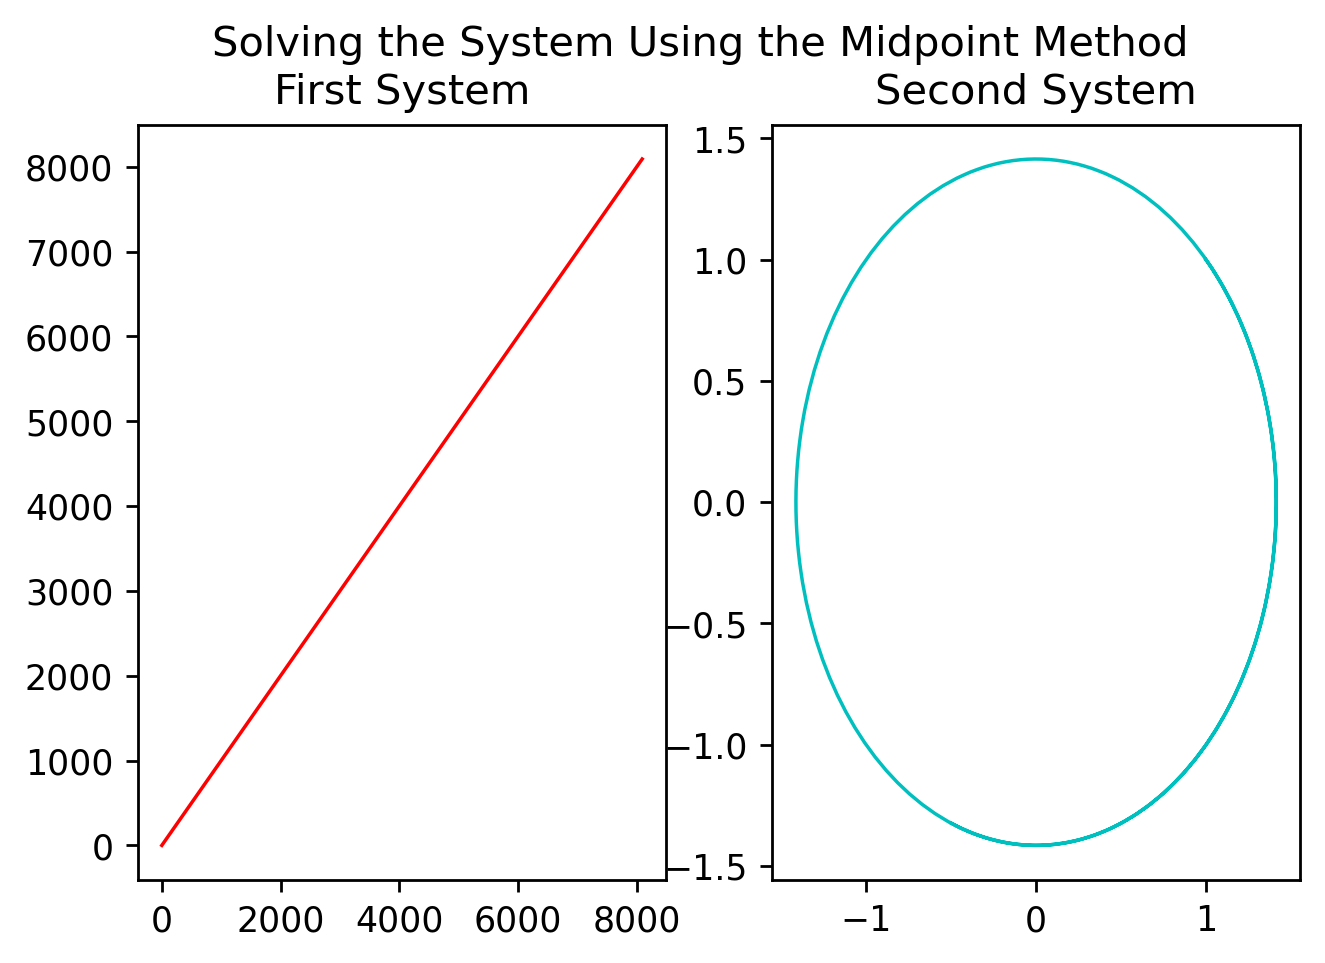

In [15]:
#set up A and initial values for first and second problem
A1 = np.array([[0, 3], [3, 0]])
ini_val1 = np.array([1, 1])

A2 = np.array([[0, 3], [-3, 0]])
ini_val2 = ini_val1.copy()

#set up initial time, final time, and the delta
deltaT = 0.01
iniT = 0
finalT = 3

t1, x1 = midpoint(A1, deltaT, iniT, finalT, ini_val1)
t2, x2 = midpoint(A2, deltaT, iniT, finalT, ini_val2)

fig = plt.figure()
fig.set_dpi(250)
ax = fig.add_subplot(121)
ax.plot(x1[0], x1[1], 'r-', lw=1)
ax.set_title(r'First System')

ax =fig.add_subplot(122)
ax.plot(x2[0], x2[1], 'c-', lw=1)
ax.set_title(r'Second System')
plt.suptitle('Solving the System Using the Midpoint Method')

plt.show()

As we can see the phase field of the first system is linear and the phase field of the second solution is periodic.

# Exercise 4.14

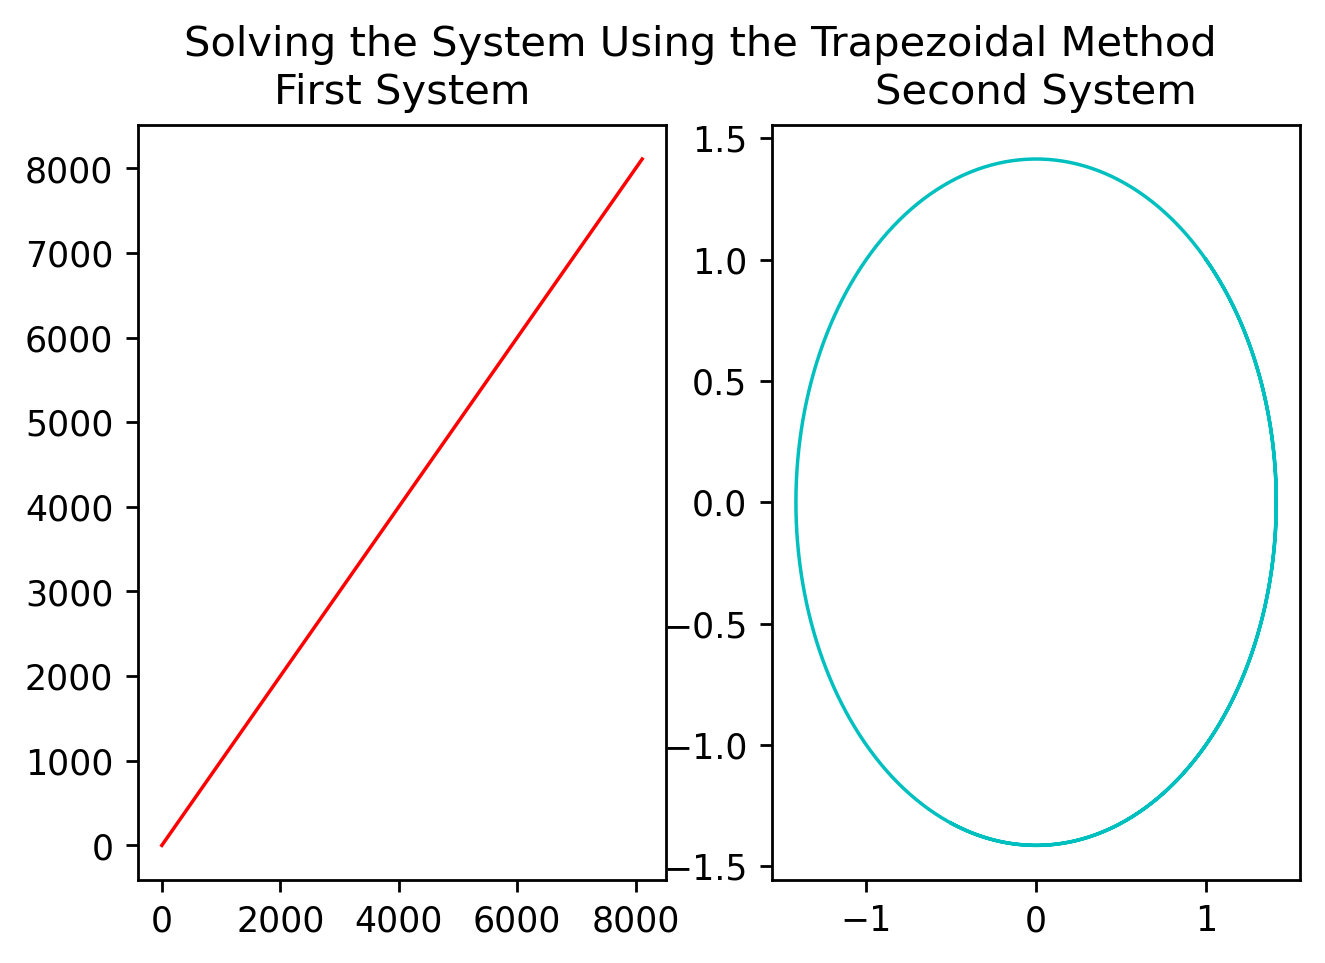

In [16]:
t1, x1 = trapezoid(A1, deltaT, iniT, finalT, ini_val1)
t2, x2 = trapezoid(A2, deltaT, iniT, finalT, ini_val2)

fig = plt.figure()
fig.set_dpi(250)
ax = fig.add_subplot(121)
ax.plot(x1[0], x1[1], 'r-', lw=1)
ax.set_title(r'First System')

ax =fig.add_subplot(122)
ax.plot(x2[0], x2[1], 'c-', lw=1)
ax.set_title(r'Second System')
plt.suptitle('Solving the System Using the Trapezoidal Method')

plt.show()

The solutions seem to converge to the same phase field. We can handle the implicit method becuase the system is linear making it easy to solve explicitly for $x(t + \Delta t)$. 

# Exercise 4.15

We use Duhamel's method / variation of parameters to find the solution to 
\begin{align}
\boldsymbol{x}'(t) &= 
\begin{bmatrix}
1 & 4 \\
1 & 1
\end{bmatrix}
\boldsymbol{x}(t) +
\begin{bmatrix}
\sin(t)\\
\cos(t)
\end{bmatrix}\\
\boldsymbol{x}(0) &=
\begin{bmatrix}
1 \\-1
\end{bmatrix}
\end{align}
We first find the fundamental matrix solution $\Phi(t) = \exp{At}$ below

In [17]:
t, s = sy.symbols('t, s')
A = sy.Matrix([[1, 4], 
               [1, 1]])
x0 = sy.Matrix([1, -1])

b = sy.Matrix([sy.sin(s), sy.cos(s)])
Phi = sy.simplify(sy.exp(A*t))
sy.latex(Phi)

'\\left[\\begin{matrix}\\frac{\\left(e^{4 t} + 1\\right) e^{- t}}{2} & \\left(e^{4 t} - 1\\right) e^{- t}\\\\\\frac{\\left(e^{4 t} - 1\\right) e^{- t}}{4} & \\frac{\\left(e^{4 t} + 1\\right) e^{- t}}{2}\\end{matrix}\\right]'

Which gives $\Phi(t)$ as
\begin{align}
\Phi(t) &=
\begin{bmatrix}\frac{\left(e^{4 t} + 1\right) e^{- t}}{2} & \left(e^{4 t} - 1\right) e^{- t}\\ \frac{\left(e^{4 t} - 1\right) e^{- t}}{4} & \frac{\left(e^{4 t} + 1\right) e^{- t}}{2}\end{bmatrix}
\end{align}
We are now ready to find the solution using Duhamel's Principle to find the solution

In [18]:
Phi_inv = Phi.subs({t: s}).inv()
integrand = Phi_inv * b
x_t = Phi*Phi.inv()*x0 + Phi*sy.integrate(integrand, (s, 0, t))
x_t = sy.simplify(x_t)
sy.latex(x_t)

'\\left[\\begin{matrix}\\frac{7 e^{3 t}}{20} - \\frac{3 \\sin{\\left(t \\right)}}{10} - \\frac{11 \\cos{\\left(t \\right)}}{10} + 1 + \\frac{3 e^{- t}}{4}\\\\\\frac{7 e^{3 t}}{40} + \\frac{\\sin{\\left(t \\right)}}{10} + \\frac{\\cos{\\left(t \\right)}}{5} - 1 - \\frac{3 e^{- t}}{8}\\end{matrix}\\right]'

This gives the solution vector as
\begin{align}
\begin{bmatrix}
x_1(t) \\x_2(t)
\end{bmatrix}
&=
\left[\begin{matrix}\frac{7 e^{3 t}}{20} - \frac{3 \sin{\left(t \right)}}{10} - \frac{11 \cos{\left(t \right)}}{10} + 1 + \frac{3 e^{- t}}{4}\\\frac{7 e^{3 t}}{40} + \frac{\sin{\left(t \right)}}{10} + \frac{\cos{\left(t \right)}}{5} - 1 - \frac{3 e^{- t}}{8}\end{matrix}\right]
\end{align}